# My Data Science Capstone Project

# INTRODUCTION

The CEO of Batogo Insurance Company is proposing to the Board of Directors to either increase the premiums for accident injury insurance or property damage insurance in the coming rainy season. He has consulted me to advise him on the basis of road accident data avaible.
On my inspection of the data, I noted only 2 categories of the severity types are recorded so far: 'Injury and prop damage'. Since this outcome is binary I decided to solve the problem by logistic regression based on their propabilities.


In [1]:
#Load Libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past road accidents. The Accident Collisons data set includes details of 194673 accident cases and 38 features. However after careful inspection of the data, I noted that the following field are of more relevance to solve the problem at hand: 

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| SEVERITYCODE   |          Codes coresponding to the severity of the accident:
                 |          
| WEATHER                 | Description of the weather condition at the time of collision                                                    |
| ROADCOND          | Description of the road condition at the time of the collision|
| ST_COLCODE | A code describing the collision.                                 

# METHODOLOGY

### Load Data From CSV File  

In [2]:
path='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df = pd.read_csv(path)
df.head()

C:\Big Data\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.shape

(194673, 38)

In [4]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
df=df[['SEVERITYCODE','WEATHER','ROADCOND','SDOT_COLCODE']]
df

,SEVERITYCODE,WEATHER,ROADCOND,SDOT_COLCODE
0,2,Overcast,Wet,11
1,1,Raining,Wet,16
2,1,Overcast,Dry,14
3,1,Clear,Dry,11
4,2,Raining,Wet,11
...,...,...,...,...
194668,2,Clear,Dry,11
194669,1,Raining,Wet,14
194670,2,Clear,Dry,11
194671,2,Clear,Dry,51


In [7]:
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,SDOT_COLCODE
0,2,Overcast,Wet,11
1,1,Raining,Wet,16
2,1,Overcast,Dry,14
3,1,Clear,Dry,11
4,2,Raining,Wet,11


In [8]:
severity_types_freq=pd.DataFrame(df.SEVERITYCODE.value_counts())
severity_types_freq

,SEVERITYCODE
1,136485
2,58188


In [9]:
weather_types_freq=pd.DataFrame(df.WEATHER.value_counts())
weather_types_freq

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [10]:
roadcond_types_freq=pd.DataFrame(df.ROADCOND.value_counts())
roadcond_types_freq

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


# Data visualization and pre-processing



The following visualizations shows that a rainy weather and wet road conditions are the second most prominent factors leading to road accidents 

Lets plot the WEATHER and ROADCOND columns to underestand data better:

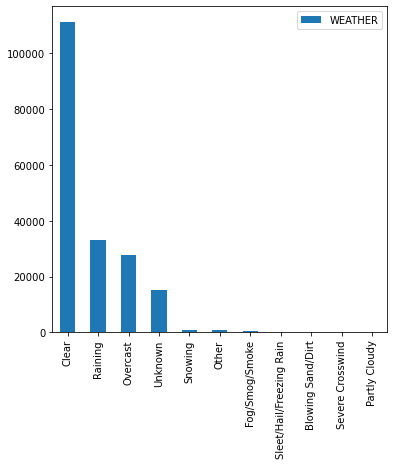

In [11]:
weather_types_freq.plot(kind='bar', figsize=(6, 6))


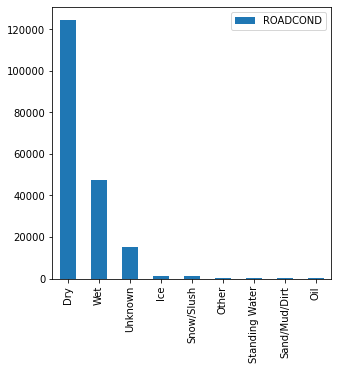

In [12]:
roadcond_types_freq.plot(kind='bar', figsize=(5, 5))


# Pre-processing:  Feature selection/extraction

## One Hot Encoding  

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [13]:
Feature = df[['SEVERITYCODE','WEATHER','ROADCOND','SDOT_COLCODE']]
Feature = pd.concat([Feature,pd.get_dummies(df[['WEATHER','ROADCOND']])], axis=1)
Feature

,SEVERITYCODE,WEATHER,ROADCOND,SDOT_COLCODE,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,...,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet
0,2,Overcast,Wet,11,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,Raining,Wet,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,Overcast,Dry,14,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,Clear,Dry,11,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,Raining,Wet,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,Clear,Dry,11,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
194669,1,Raining,Wet,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
194670,2,Clear,Dry,11,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
194671,2,Clear,Dry,51,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [14]:
Feature.columns

Index(['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'SDOT_COLCODE',
       'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke',
       'WEATHER_Other', 'WEATHER_Overcast', 'WEATHER_Partly Cloudy',
       'WEATHER_Raining', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing',
       'WEATHER_Unknown', 'ROADCOND_Dry', 'ROADCOND_Ice', 'ROADCOND_Oil',
       'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush',
       'ROADCOND_Standing Water', 'ROADCOND_Unknown', 'ROADCOND_Wet'],
      dtype='object')

In [15]:
Feature['SEVERITYCODE']

0         2
1         1
2         1
3         1
4         2
         ..
194668    2
194669    1
194670    2
194671    2
194672    1
Name: SEVERITYCODE, Length: 194673, dtype: int64

In [16]:
y=Feature['SEVERITYCODE']
y

0         2
1         1
2         1
3         1
4         2
         ..
194668    2
194669    1
194670    2
194671    2
194672    1
Name: SEVERITYCODE, Length: 194673, dtype: int64

In [17]:
y.replace(to_replace=[1,2], value=[0,1],inplace=True)
y.head(10)

0    1
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: SEVERITYCODE, dtype: int64

In [18]:
Feature.drop('WEATHER',axis=1,inplace=True)
Feature.drop('ROADCOND',axis=1,inplace=True)
Feature.drop('SEVERITYCODE',axis=1,inplace=True)

In [19]:
Feature.head(10)

,SDOT_COLCODE,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,...,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet
0,11,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,16,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,14,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,11,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,11,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,11,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,11,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,51,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,11,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,11,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [35]:
X=Feature

In [36]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.42, -0.02, -1.15, -0.05, -0.07,  2.45, -0.01, -0.45, -0.01,
        -0.02, -0.07, -0.29, -1.33, -0.08, -0.02, -0.03, -0.02, -0.07,
        -0.02, -0.29,  1.76],
       [ 0.31, -0.02, -1.15, -0.05, -0.07, -0.41, -0.01,  2.21, -0.01,
        -0.02, -0.07, -0.29, -1.33, -0.08, -0.02, -0.03, -0.02, -0.07,
        -0.02, -0.29,  1.76],
       [ 0.02, -0.02, -1.15, -0.05, -0.07,  2.45, -0.01, -0.45, -0.01,
        -0.02, -0.07, -0.29,  0.75, -0.08, -0.02, -0.03, -0.02, -0.07,
        -0.02, -0.29, -0.57],
       [-0.42, -0.02,  0.87, -0.05, -0.07, -0.41, -0.01, -0.45, -0.01,
        -0.02, -0.07, -0.29,  0.75, -0.08, -0.02, -0.03, -0.02, -0.07,
        -0.02, -0.29, -0.57],
       [-0.42, -0.02, -1.15, -0.05, -0.07, -0.41, -0.01,  2.21, -0.01,
        -0.02, -0.07, -0.29, -1.33, -0.08, -0.02, -0.03, -0.02, -0.07,
        -0.02, -0.29,  1.76]])

# Splitting the data

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 21) (155738,)
Test set: (38935, 21) (38935,)


### Feature selection

Lets define feature sets, X:

In [38]:
X_train.shape

(155738, 21)

In [39]:
X_test.shape

(38935, 21)

In [40]:
y_train.shape

(155738,)

In [41]:
y_test.shape

(38935,)

# Modeling and Prediction

# Logistic Regression

Since the severity code indicates on two of the severity codes:
1 : propery damage
2 : Injury
and the solution is about predicting the most dominant of the two, I chose Logistic Regression as the estimator
The code for prop damage was replaced with 0 and Injury with 1

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [43]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.7 , 0.3 ],
       [0.72, 0.28],
       [0.69, 0.31],
       ...,
       [0.71, 0.29],
       [0.82, 0.18],
       [0.67, 0.33]])

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[  480 11030]
 [  424 27001]]


Confusion matrix, without normalization
[[  480 11030]
 [  424 27001]]


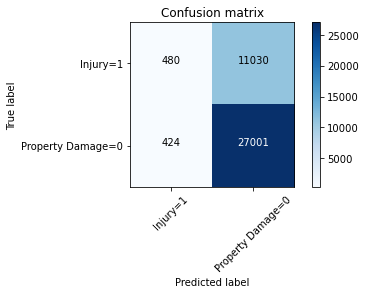

In [50]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

In [47]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5758956942308882

In [48]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.71      0.98      0.83     27425
           1       0.53      0.04      0.08     11510

    accuracy                           0.71     38935
   macro avg       0.62      0.51      0.45     38935
weighted avg       0.66      0.71      0.60     38935



# RESULTS

Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

Recall is true positive rate. It is defined as: Recall =  TP / (TP + FN)

The recall in favour of property damage is 98% as compared to 0.04 percent for injury.


# CONCLUSION

Having discovered that property damage has a high recall rate I will recommend to the CEO to go ahead and increase the premium for property insurance to offset the impact of high claims numbers in the coming rainy season. 

# BLOG

In [ ]:
https://www.blogger.com/u/1/blog/post/edit/507036395518728121/522583079983638520